# Tugas Besar 2 IF3170 Inteligensi Buatan

**Dibuat Oleh Kelompok 9 dengan anggota**<br>
**1. 13516002 Antonio Setya**<br>
**2. 13516039 Alvin Limassa**<br>
**3. 13516068 Seperayo**<br>
**4. 13516143 Juan Felix Parsaoran**<br>
**5. 13516146 Aristoteles Swarna Wirahadi**<br>

## *Read the dataset*

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 30
%matplotlib inline

In [245]:
df = pd.read_csv('tubes2_HeartDisease_train.csv')
df_eval = pd.read_csv('tubes2_HeartDisease_test.csv')

In [246]:
target = df['Column14']
df.drop("Column14" ,axis = 1,inplace=True)

## *Feature Engineering*

*Feature Engineering* adalah suatu proses yang menggunakan domain knowledge dari suatu data untuk membuat fitur yang menjalankan algoritma *machine learning*. Proses ini sangat penting dalam pengaplikasian *machine learning*, namun proses ini cukup sulit dan mahal sifatnya.

Dalam tugas kali ini penanganan dan analisa data yang kami lakukan adalah dengan **Null Imputation, Change Data Type, Transform Data, Deal with Imbalance Data**. Selain itu, ukuran kinerja yang kami gunakan dalam eksperimen ini adalah *accuracy, precision, recall, dan F1*.

### *Null Imputation*

Data yang diberikan dalam pengerjaan tugas ini memiliki beberapa bagian yang tidak tercantum atau bisa dibilang hilang. Terdapat beberapa cara dalam mengolah permasalahan ini, seperti mengabaikan, mengisi, dan menghapus data terkait. Pengabaian data dapat menimbulkan permasalahan dalam analisis data ditahap-tahap selanjutnya. Dalam tugas kali ini, kami memilih mengisikan data yang hilang dengan *fillna()*.

In [247]:
for column in list(df):
    temp = []
    for value in df[column]:
        if value == '?':
            temp.append(np.nan)
        else:
            temp.append(value)
    df[column] = temp
    
for column in list(df_eval):
    temp = []
    for value in df_eval[column]:
        if value == '?':
            temp.append(np.nan)
        else:
            temp.append(value)
    df_eval[column] = temp

In [248]:
#Filling the missing data
for column in list(df):
    df[column] = df[column].fillna(df[column].median())


for column in list(df_eval):
    df_eval[column] = df_eval[column].fillna(df_eval[column].median())


In [249]:
df['Column7'] = df['Column7'].fillna(df['Column7'].median())

### *Change data type*

Selain Null Imputation, kami juga menerapkan Change Data Type dengan method *astype()*. Method ini memungkinkan kita untuk secara *explicit* melakukan konversi *dtype* yang diinginkan. Penggunaan method ini juga memberikan tingkat serba guna yang tinggi dalam proses konversi ke berbagai tipe. 

In [250]:
df['Column4'] = df['Column4'].astype('int64')
df['Column5'] = df['Column5'].astype('int64')
df['Column6'] = df['Column6'].astype('int64')
df['Column7'] = df['Column7'].astype('int64')
df['Column8'] = df['Column8'].astype('int64')
df['Column9'] = df['Column9'].astype('int64')
df['Column10'] = df['Column10'].astype('float64')
df['Column11'] = df['Column11'].astype('int64')
df['Column12'] = df['Column12'].astype('int64')
df['Column13'] = df['Column13'].astype('int64')

In [251]:
df_eval['Column4'] = df_eval['Column4'].astype('int64')
df_eval['Column5'] = df_eval['Column5'].astype('int64')
df_eval['Column6'] = df_eval['Column6'].astype('int64')
df_eval['Column7'] = df_eval['Column7'].astype('int64')
df_eval['Column8'] = df_eval['Column8'].astype('int64')
df_eval['Column9'] = df_eval['Column9'].astype('int64')
df_eval['Column10'] = df_eval['Column10'].astype('float64')
df_eval['Column11'] = df['Column11'].astype('int64')
df_eval['Column12'] = df_eval['Column12'].astype('int64')
df_eval['Column13'] = df_eval['Column13'].astype('int64')

### *Transform Data*

Kami menstandarisasi data dengan mentransform data. Disini kami menggunakan RobustScaler yang akan menghilangkan dan menskalakan data dengan interkuartil data. RobustScaler digunakan karena data ini memiliki banyak outlier. Sehingga jika menskalakan data dengan mean atau variansi tidak akan menghasilkan prediksi yang baik

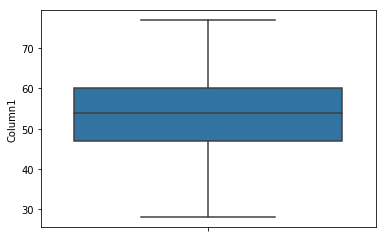

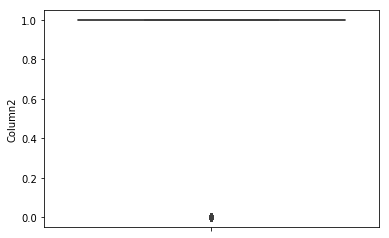

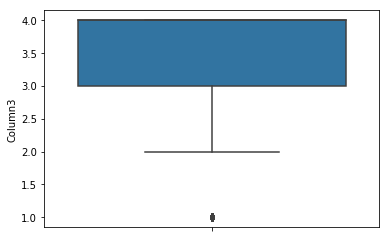

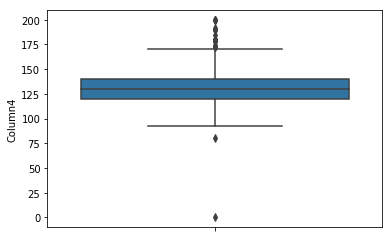

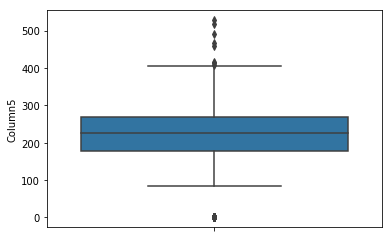

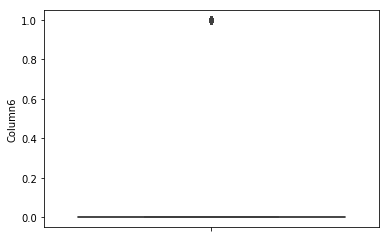

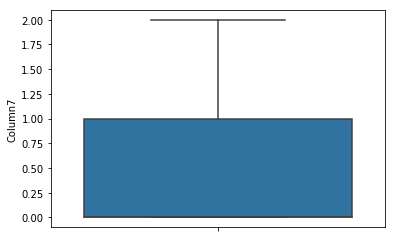

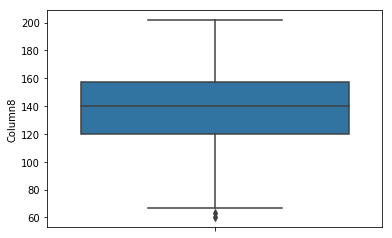

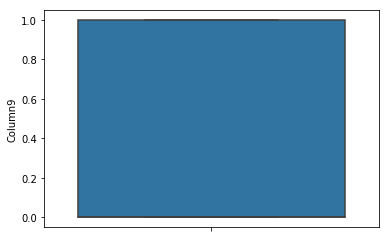

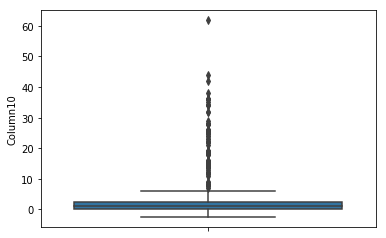

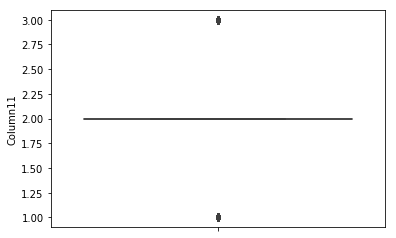

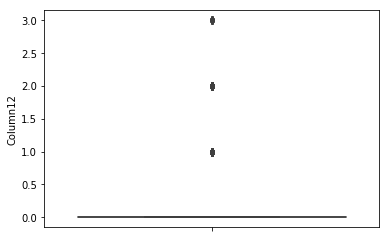

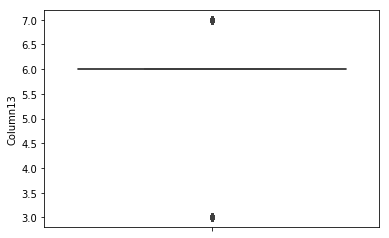

In [252]:
#memeriksa outlier
plt.figure()
for x in list(df):
    if(df.dtypes[x]=='int64' or df.dtypes[x]=='float64'):
        sns.boxplot(df[x], orient='v')
        plt.show()

In [253]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df)
df = transformer.transform(df)
transformer = RobustScaler().fit(df_eval)
X_res_eval = transformer.transform(df_eval)
df_eval = pd.DataFrame({'Column1':X_res_eval[:,0],'Column2':X_res_eval[:,1],'Column3':X_res_eval[:,2],'Column4':X_res_eval[:,3],'Column5':X_res_eval[:,4],'Column6':X_res_eval[:,5],'Column7':X_res_eval[:,6],'Column8':X_res_eval[:,7],'Column9':X_res_eval[:,8],'Column10':X_res_eval[:,9],'Column11':X_res_eval[:,10],'Column12':X_res_eval[:,11],'Column13':X_res_eval[:,12]})

### *Dealing with imbalance data*

Kami menggunakan teknik *oversampling* dalam meningkatkan kualitas *predictive modelling*, dimana model dapat melakukan pembelajaran pola yang membedakan kelas dengan lebih baik. Sesuai namanya, teknik ini akan meningkatkan jumlah sample dalam data set dengan menggunakan data sintetik. Tujuannya adalah untuk meningkatkan kelas dengan jumlah sample yang sedikit atau *minority*, sehingga data set menjadi lebih seimbang. Method yang kami gunakan adalah *smote()*, method ini akan mencari *n-nearest neighbors* dari kelas minority untuk setiap sample di kelas, kemudian berdasarkan hasil pencarian method *smote()* akan menarik garis ke setiap tetangga terdekat dan membuat random point pada setiap garis itu. Titik inilah yang menjadi sample sintetik.

In [254]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, target)
print('Resampled data train shape %s' % Counter(y_res))

Resampled data train shape Counter({1: 349, 0: 349, 3: 349, 2: 349, 4: 349})


In [255]:
df = pd.DataFrame({'Column1':X_res[:,0],'Column2':X_res[:,1],'Column3':X_res[:,2],'Column4':X_res[:,3],'Column5':X_res[:,4],'Column6':X_res[:,5],'Column7':X_res[:,6],'Column8':X_res[:,7],'Column9':X_res[:,8],'Column10':X_res[:,9],'Column11':X_res[:,10],'Column12':X_res[:,11],'Column13':X_res[:,12]})
df['Column14'] = y_res
target = df['Column14']
df.drop("Column14" ,axis = 1,inplace=True)

##  *Modeling*

### *Confusion Matrix*

In [256]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = ['0','1','2','3','4']

### *Split the data*

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, random_state=42)

### *Naive Bayes*

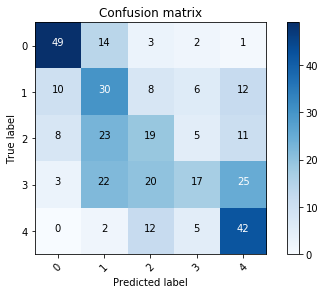

In [259]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
model_nb = naivebayes.fit(X_train,y_train)
nb_predict = model_nb.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, nb_predict), classes)

In [260]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

print("Without CV")
report_lr = precision_recall_fscore_support(y_test, nb_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,nb_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_nb, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_nb, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_nb, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_nb, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.460444
Recall = 0.449857
F1 = 0.433870
Accuracy = 0.449857

Cross Validation 10
Accuracy: 0.465378 (+/- 0.063703)
Precision: 0.453334 (+/- 0.071175)
Recall: 0.465378 (+/- 0.063703)
F1: 0.446851 (+/- 0.060313)


### *MLP*

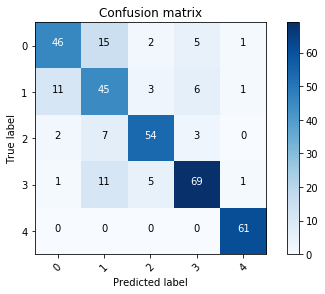

In [261]:
#mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(36),random_state=1, max_iter = 1000)
model_mlp = mlp.fit(X_train,y_train)
mlp_predict = model_mlp.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, mlp_predict), classes)

In [262]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, mlp_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,mlp_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.794070
Recall = 0.787966
F1 = 0.789254
Accuracy = 0.787966

Cross Validation 10
Accuracy: 0.792218 (+/- 0.153311)
Precision: 0.792248 (+/- 0.156353)
Recall: 0.792218 (+/- 0.153311)
F1: 0.789403 (+/- 0.154517)


### *K-NN*

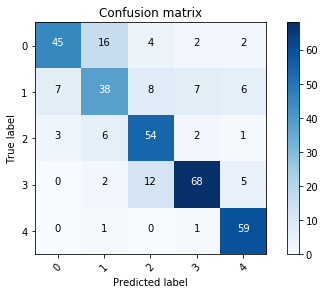

In [263]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)
knn_predict = model_knn.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, knn_predict), classes)

In [264]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, knn_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,knn_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_knn, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_knn, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_knn, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_knn, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.759908
Recall = 0.756447
F1 = 0.753671
Accuracy = 0.756447

Cross Validation 10
Accuracy: 0.804723 (+/- 0.064448)
Precision: 0.801153 (+/- 0.067982)
Recall: 0.804723 (+/- 0.064448)
F1: 0.798131 (+/- 0.068448)


### *Decision Tree Learning*

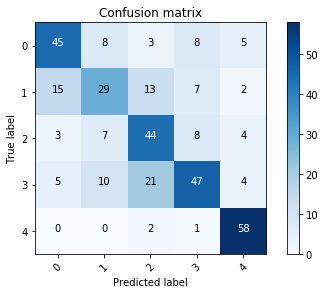

In [265]:
from sklearn import tree

tree_dtl = tree.DecisionTreeClassifier()
model_tree = tree_dtl.fit(X_train,y_train)
tree_predict = model_tree.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, tree_predict), classes)

In [266]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, tree_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,tree_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_tree, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_tree, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_tree, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_tree, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.636537
Recall = 0.638968
F1 = 0.632590
Accuracy = 0.638968

Cross Validation 10
Accuracy: 0.701092 (+/- 0.132571)
Precision: 0.705577 (+/- 0.136817)
Recall: 0.699429 (+/- 0.143582)
F1: 0.704511 (+/- 0.138440)


## *Save best model to external file*

Menurut hasil percobaan kami, model terbaik yang sesuai dengan data set adalah model **KNN** (Skor terbesar dengan standar deviasi pada cross validation lebih kecil). Oleh karena itu model disimpan pada file eksternal

In [267]:
#Saving Model to KNN.dat
from sklearn.externals import joblib
joblib.dump(model_knn, 'KNN.dat')

['KNN.dat']

## *Load Data Model*

In [268]:
model_knn = joblib.load('KNN.dat')

In [269]:
prob = model_knn.predict(df_eval)

## *Predict test data*

In [270]:
diagnose = []
for probitem in prob:
    if (probitem == 0):
        diagnose.append('absence')
    else:
        diagnose.append('presence')

In [271]:
df_eval['predict'] = prob
df_eval['diagnose'] = diagnose

In [272]:
df_eval['predict'].value_counts()

1    44
0    38
3    24
2    21
4    14
Name: predict, dtype: int64

In [273]:
df_eval

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,predict,diagnose
0,0.545455,0.0,-0.5,1.250000,0.746667,1.0,1.0,0.75000,0.0,-0.25,0.0,0.0,0.0,3,presence
1,0.636364,0.0,0.5,0.750000,-0.106667,0.0,0.0,0.87500,0.0,-0.50,0.0,1.0,0.0,1,presence
2,0.000000,0.0,0.5,0.000000,0.413333,0.0,0.0,-1.31250,1.0,0.00,-1.0,0.0,0.0,1,presence
3,-0.545455,0.0,0.5,-0.416667,0.653333,0.0,0.0,-0.56250,0.0,0.50,0.0,0.0,0.0,1,presence
4,0.272727,-1.0,-1.0,0.000000,1.293333,0.0,0.0,-1.09375,0.0,0.00,-1.0,0.0,0.0,0,absence
5,0.090909,0.0,0.0,0.000000,0.226667,0.0,1.0,0.00000,0.0,0.00,0.0,0.0,0.0,2,presence
6,-0.272727,0.0,0.5,0.416667,1.160000,0.0,0.0,-0.34375,1.0,20.50,0.0,3.0,0.0,4,presence
7,0.727273,0.0,0.5,0.000000,-0.546667,0.0,1.0,-0.40625,1.0,1.00,0.0,0.0,0.0,2,presence
8,-0.454545,-1.0,0.0,1.250000,-0.413333,0.0,0.0,0.71875,0.0,0.00,0.0,0.0,0.0,0,absence
9,1.181818,-1.0,0.0,-0.625000,4.706667,0.0,2.0,0.84375,0.0,7.50,0.0,0.0,0.0,1,presence
